# The Effect of COVID-19 on U.S. Mobility: An Analysis of Google Community Mobility Reports

## Abstract {Han}
This study investigates the impact of the COVID-19 pandemic on mobility patterns in the United States using Google Community Mobility Reports. The research employs descriptive statistics, time-series analysis, and regression models to analyze the data. `TODO: MAKE THIS DESCRIPTION DETAILED` The results indicate significant changes in mobility patterns during the pandemic, with notable variations across different regions and sectors. The findings have implications for policymakers and future research on the long-term consequences of the pandemic on human mobility.

## Introduction {Han}
The COVID-19 pandemic has significantly affected the lives of people worldwide, leading to widespread changes in individual behavior and societal norms. One of the most noticeable consequences of the pandemic has been its impact on human mobility patterns. Understanding the effect of COVID-19 on mobility is essential for evaluating the pandemic's economic, social, and public health implications. This study aims to assess the effect of COVID-19 on U.S. mobility using Google Community Mobility Reports as a data source.`TODO: To be extended`

## Literature Review {Han}

Existing studies have examined the effects of the pandemic on mobility patterns, generally indicating significant reductions in travel and movement, particularly during lockdown periods. Google Community Mobility Reports have emerged as a valuable data source for understanding these mobility changes, as they provide daily, anonymized, and aggregated data on movement trends across various categories. However, more comprehensive research is needed to better understand the factors contributing to these changes and the potential long-term implications of the pandemic on human mobility.

`TODO: To be extended with citations in APA format`

## Methodology
### Data Source {Lei}
Google Community Mobility Reports provide daily data on mobility trends across six categories: retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, and residential areas. The data is collected from users who have opted-in to location history tracking on their Google accounts.

We selected data from January 2020 to December 2022, representing the pre-pandemic and pandemic periods. The data was cleaned and preprocessed to address missing values and inconsistencies. We aggregated the data at the state level to facilitate regional analysis. The following sections provide the descriptive exploratory data analysis.


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [44]:
US_2020 = pd.read_csv('data/2020_US_Region_Mobility_Report.csv', low_memory=False)
US_2021 = pd.read_csv('data/2021_US_Region_Mobility_Report.csv', low_memory=False)
US_2022 = pd.read_csv('data/2022_US_Region_Mobility_Report.csv', low_memory=False)

Concatenate three dataframes 

In [45]:
US_Mobility = pd.concat([US_2020, US_2021, US_2022], ignore_index=True)

US_Mobility.sample(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1208987,US,United States,Michigan,Mason County,NaN,NaN,26105.0,ChIJYxH9iSMUHIgRFW2Lv6ozBaA,2021-01-23,-20.0,NaN,NaN,NaN,-8.0,NaN
2387302,US,United States,Texas,Hockley County,NaN,NaN,48219.0,ChIJQ4trX6Tl_YYRx88hmvzsQN0,2022-06-19,-8.0,NaN,NaN,NaN,-21.0,NaN
2052868,US,United States,Maryland,Charles County,NaN,NaN,24017.0,ChIJH-7gtegPt4kRSuCHc6gCWbE,2022-06-05,-11.0,-5.0,NaN,NaN,-23.0,0.0
1051210,US,United States,Indiana,Morgan County,NaN,NaN,18109.0,ChIJI_JuDtObbIgRFB8B1JTcnuw,2021-02-12,-14.0,-4.0,NaN,NaN,-20.0,9.0
1163162,US,United States,Louisiana,Richland Parish,NaN,NaN,22083.0,ChIJNW1aqAqrL4YRy2dlp3XJsZc,2021-04-10,NaN,NaN,NaN,17.0,-6.0,NaN


In [46]:
US_Mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511994 entries, 0 to 2511993
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          float64
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

rename columns and select relevant columns

In [47]:
# rename columns
US_Mobility = US_Mobility.rename(columns = {'sub_region_1': 'state',
                                            'sub_region_2': 'county',
                                            'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation',
                                            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                                            'parks_percent_change_from_baseline':'parks',
                                            'transit_stations_percent_change_from_baseline':'transit_stations',
                                            'workplaces_percent_change_from_baseline':'workplaces',
                                            'residential_percent_change_from_baseline':'residential'} )

In [48]:
columns = ['state',
           'county',
           'date',
           'retail_and_recreation', 
           'grocery_and_pharmacy', 
           'parks',
           'transit_stations', 
           'workplaces', 
           'residential']
US_Mobility = US_Mobility[columns]

US_Mobility.sample(5)

,state,county,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1874275,Georgia,Fannin County,2022-01-10,4.0,NaN,NaN,NaN,-5.0,5.0
948431,Georgia,Dawson County,2021-07-01,27.0,26.0,NaN,NaN,-20.0,5.0
419366,Missouri,Washington County,2020-07-17,NaN,NaN,NaN,NaN,-10.0,NaN
1652819,Utah,Uintah County,2021-06-07,32.0,NaN,NaN,NaN,-34.0,-1.0
1496016,Pennsylvania,Carbon County,2021-06-22,11.0,28.0,NaN,NaN,-20.0,7.0


In [49]:
US_Mobility['year_month'] = US_Mobility['date'].str.rsplit('-', n=1, expand=True).drop(columns=1, axis=1)
US_Mobility['year_month']

0          2020-02
1          2020-02
2          2020-02
3          2020-02
4          2020-02
            ...   
2511989    2022-10
2511990    2022-10
2511991    2022-10
2511992    2022-10
2511993    2022-10
Name: year_month, Length: 2511994, dtype: object

Group data by year and month

In [50]:
groupby_data = US_Mobility.groupby('year_month').mean(numeric_only=True).reset_index()
groupby_data.head()

,year_month,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2020-02,6.145196,2.103233,14.454504,4.253531,-0.086161,0.232813
1,2020-03,-10.379869,5.360028,14.432377,-8.988731,-14.747643,6.571577
2,2020-04,-34.688613,-9.515706,1.069038,-31.144862,-37.378917,16.550969
3,2020-05,-15.271136,2.834255,38.376006,-16.831389,-28.982362,11.671517
4,2020-06,-3.024183,7.141806,68.486314,-5.046891,-22.866399,7.511058


Retail & recreation

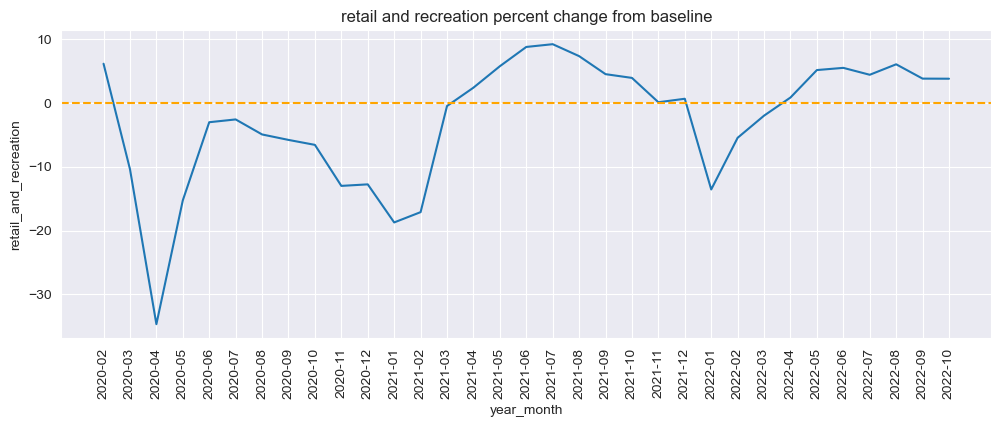

In [51]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='retail_and_recreation')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('retail and recreation percent change from baseline')
plt.savefig('figures/retail_and_recreation_percent_change_from_baseline.png');

Parks

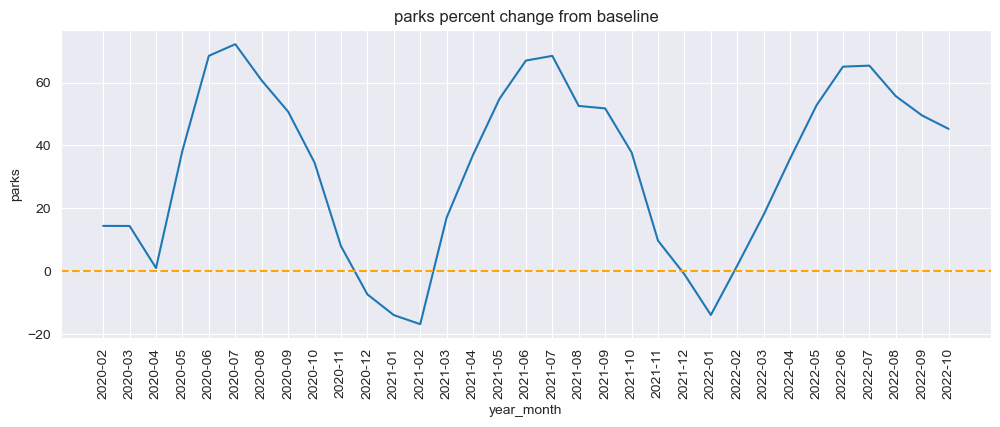

In [52]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='parks')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('parks percent change from baseline')
plt.savefig('figures/parks_percent_change_from_baseline.png');

Transit stations

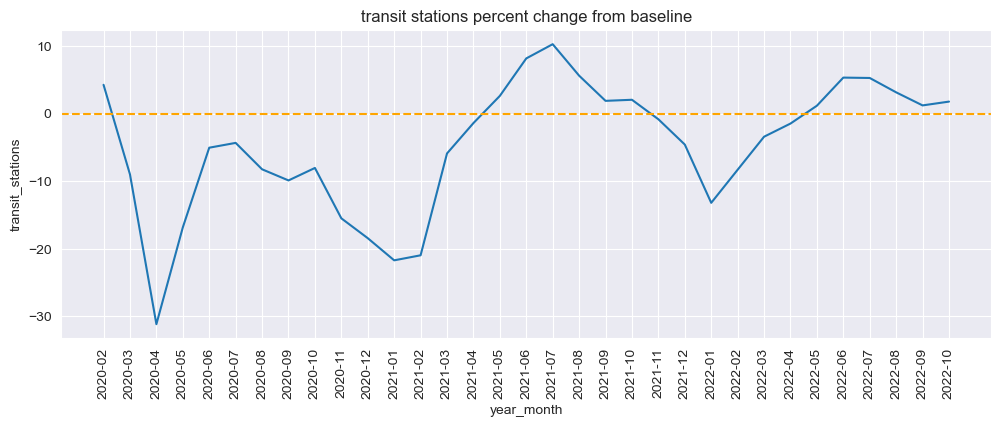

In [53]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='transit_stations')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('transit stations percent change from baseline')
plt.savefig('figures/transit_stations_percent_change_from_baseline.png');

Grocery & pharmacy

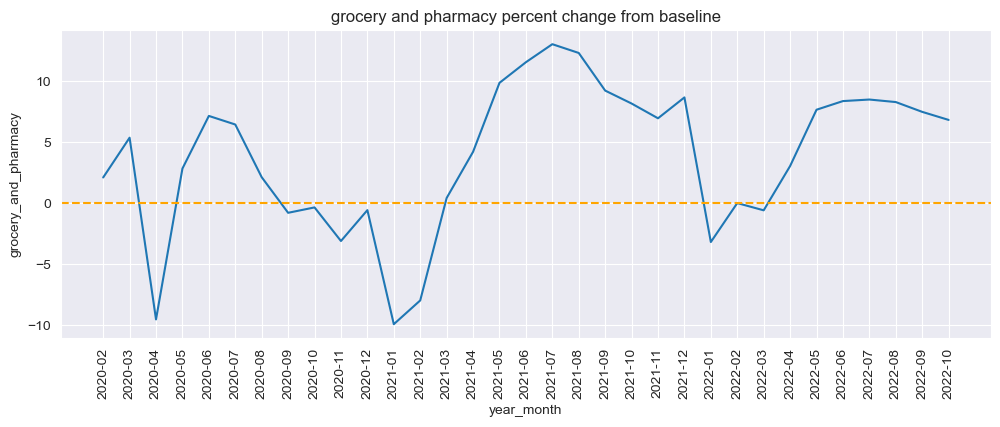

In [54]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='grocery_and_pharmacy')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('grocery and pharmacy percent change from baseline')
plt.savefig('figures/grocery_and_pharmacy_percent_change_from_baseline.png');

Residential

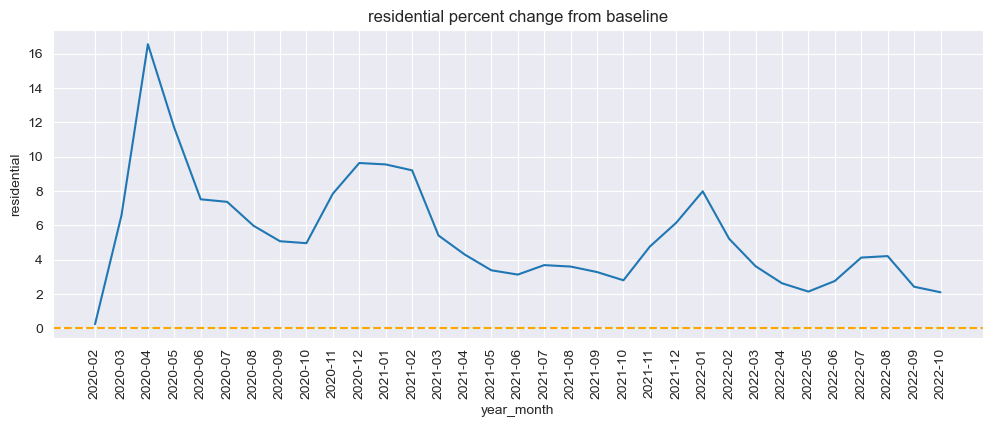

In [55]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='residential')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('residential percent change from baseline')
plt.savefig('figures/residential_percent_change_from_baseline.png');

Workplaces

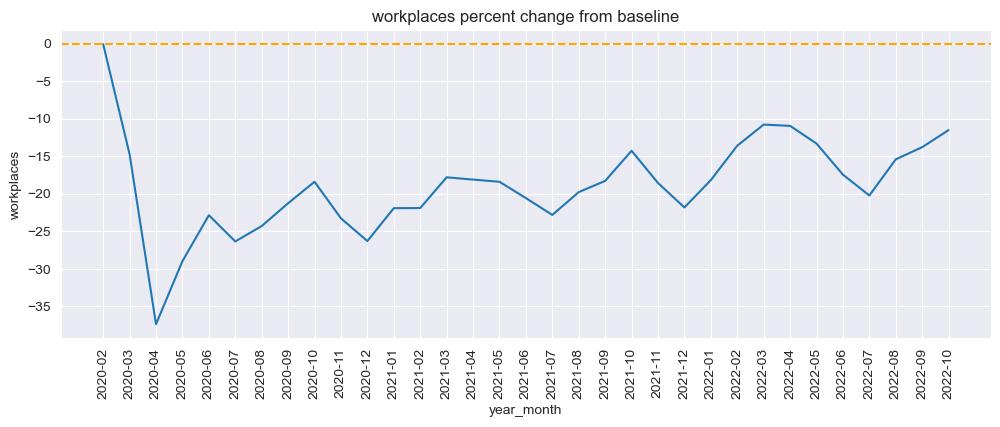

In [56]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=groupby_data, x='year_month', y='workplaces')
ax.axhline(y=0, linestyle='dashed', color='orange')
plt.xticks(rotation=90)
plt.title('workplaces percent change from baseline')
plt.savefig('figures/workplaces_percent_change_from_baseline.png');

Our analysis revealed significant decreases in mobility across all categories during the pandemic, with the most substantial reductions observed in retail and recreation, transit stations, and workplaces. The residential category experienced increased mobility, reflecting the shift to remote work and stay-at-home orders.

In the following part, we provide the in depth analysis of the mobility trends by mobility categories.

### Transit Stations {Han} `TODO`
Sharp decline in mobility as people reduced non-essential travel and public transportation use
Gradual recovery in some areas, but remained lower than pre-pandemic levels overall

### Parks {Han} `TODO`

Fluctuations in mobility, with increases observed during lockdowns as people sought outdoor recreation while adhering to social distancing guidelines
Weather and regional factors played a role in determining park mobility patterns

### Grocery and Pharmacy {} `TODO`

Initial surge in mobility during panic-buying phase, followed by stabilization at lower levels compared to pre-pandemic
Shift to online shopping and home delivery contributed to reduced mobility

### Retail and Recreation {} `TODO`

Substantial decline in mobility during lockdowns and resurgence of activity during reopening phases
Variation in the extent of decline across different regions

### Residential {} `TODO`

Increased mobility as people spent more time at home due to remote work and stay-at-home orders
Varied by region, reflecting differences in policy responses and local conditions

### Workplaces {} `TODO`

Decreased mobility due to remote work policies and business closures
Uneven recovery, with some sectors returning to in-person work faster than others

## Conclusion {Han}

This study contributes to the understanding of the effect of COVID-19 on U.S. mobility patterns by providing a comprehensive analysis of Google Community Mobility Reports data across various mobility categories. The findings demonstrate the pandemic's significant and varied impact on different aspects of mobility, with implications for policymakers and future research on the long-term consequences of the pandemic on human mobility.

Our analysis revealed that the retail and recreation, transit stations, and workplaces categories experienced the most substantial reductions in mobility during the pandemic. These sectors were highly vulnerable to the effects of social distancing measures and lockdowns. In contrast, the residential category saw increased mobility as people adapted to remote work and stay-at-home orders.

The time-series analysis demonstrated a strong association between mobility changes and key pandemic events, such as lockdowns and reopening phases. However, mobility patterns exhibited a high degree of variation across states and over time, reflecting differing policy responses and regional characteristics. This highlights the importance of considering regional variations when designing policies and interventions to address the pandemic's impact on mobility.

`TODO: Conclusion by mobility categories`

As the COVID-19 pandemic continues to evolve, it is crucial to monitor mobility trends and adapt policies accordingly. Future research could explore the long-term implications of the pandemic on mobility, such as potential shifts in work-from-home policies, urban planning, and transportation infrastructure. Additionally, examining the role of vaccination campaigns in shaping mobility trends can provide valuable insights for policymakers as they navigate the ongoing pandemic and its aftermath.

In conclusion, this study offers a comprehensive analysis of the effect of COVID-19 on U.S. mobility patterns using Google Community Mobility Reports data. The findings underscore the pandemic's significant and multifaceted impact on various aspects of mobility, emphasizing the importance of tailored policy interventions and continued research to better understand and address the long-term consequences of the pandemic on human mobility.